In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function to perform data standardization 
from sklearn.preprocessing import StandardScaler

# Libraries to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import classes for ML Models
from sklearn.linear_model import Ridge  ## Linear Regression + L2 regularization
from sklearn.svm import SVR ## Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
## import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBRegressor
from xgboost import plot_importance  ## to plot feature importance

# To save the final model on disk
from sklearn.externals import joblib  ## Reference http://scikit-learn.org/stable/modules/model_persistence.html

In [2]:
df=pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Display the dimention of Dataset

In [3]:
df.shape

(537577, 12)

In [4]:
df.dtypes[df.dtypes=='object']

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

We listed the catagorical data

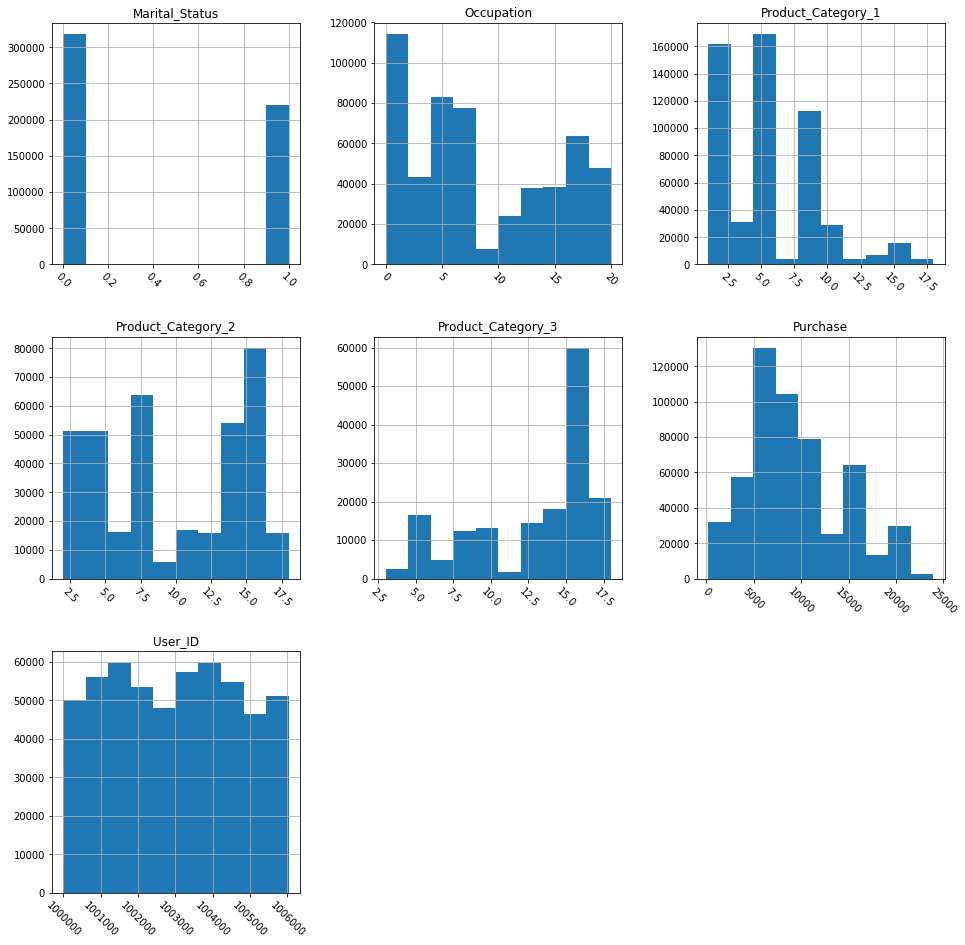

In [11]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

* In 1st graph we see that Single people make more purchase than married.
* Occupation between 0-3 make more purchase.

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


We see that 'Product_Category_2', 'Product_Category_3' have missing values.

In [6]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


* There is no missing values in catagorical data.
* In gender most of the purchase is done by Male.
* Most of purchase is done in City B.
* Most of purchase is take place between Age group of 26-35.

# Ploting 

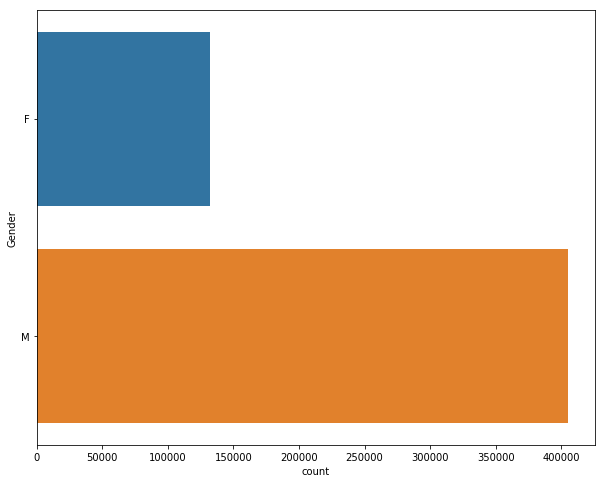

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(y='Gender', data=df)

* As we see most of the purchase is done by Male

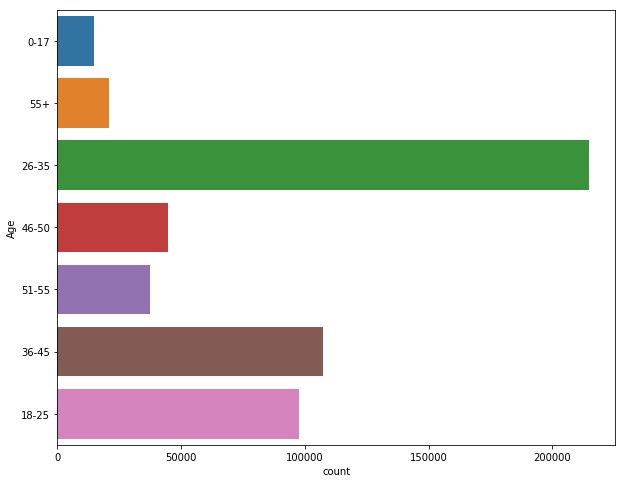

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(y='Age', data=df)

* Age 26-35 make more purchase.

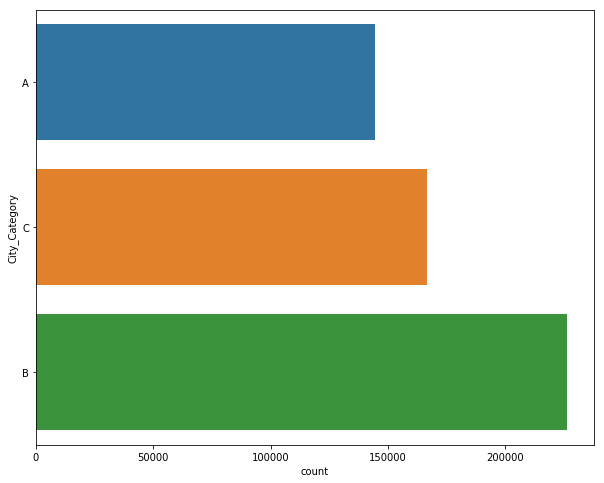

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(y='City_Category', data=df)

* In City B purchase is more 

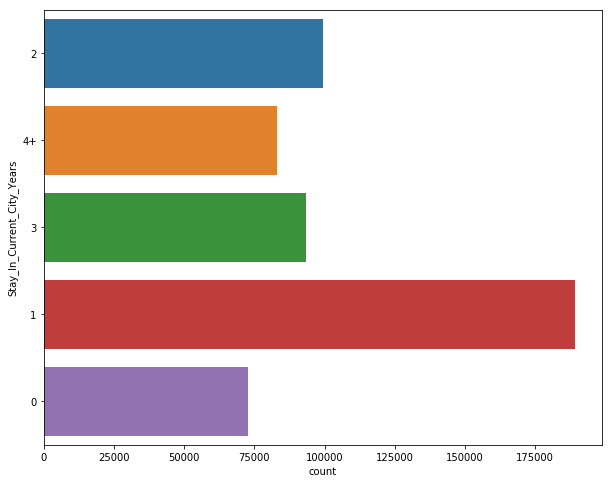

In [58]:
plt.figure(figsize=(10,8))
sns.countplot(y='Stay_In_Current_City_Years', data=df)

# Segmentation.

Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

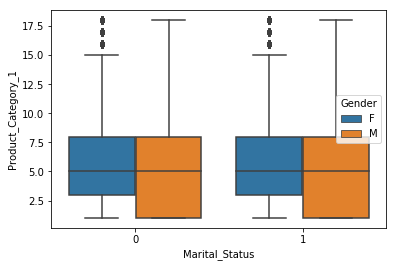

In [19]:
sns.boxplot(x='Marital_Status', y='Product_Category_1',hue='Gender', data=df)

* Maybe this category of product is common for both male and female.

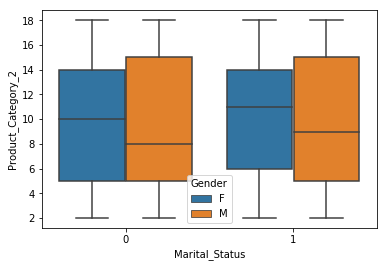

In [21]:
sns.boxplot(x='Marital_Status', y='Product_Category_2',hue='Gender', data=df)

* Maybe this category of product is mostly for women.

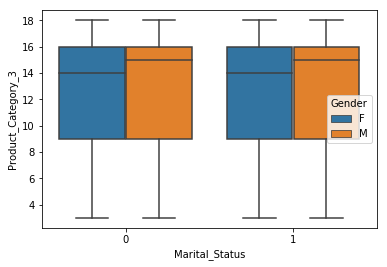

In [22]:
sns.boxplot(x='Marital_Status', y='Product_Category_3',hue='Gender', data=df)

* Maybe this category of product of mostly purchase by Male.

In [27]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


In [29]:
df.corr().Purchase


User_ID               0.005389
Occupation            0.021104
Marital_Status        0.000129
Product_Category_1   -0.314125
Product_Category_2   -0.209973
Product_Category_3   -0.022257
Purchase              1.000000
Name: Purchase, dtype: float64

Here we see that Occupation have more correlation with Purchase

# Data Cleaning

### 1.Droping Duplicates

In [30]:
df.shape

(537577, 12)

In [31]:
df = df.drop_duplicates()
print( df.shape )

(537577, 12)


There is no duplicates is our dataset

### Fix Structural Errors

Remember the 'Product_Catagorical_2' and 'Product_Catagorical_3' features? They have NaN values.

These are the unique values.


In [3]:
print( df.Product_Category_2.unique() )

[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [4]:
print( df.Product_Category_3.unique() )

[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [5]:
# Missing Product_Category_2 values should be 0
df['Product_Category_2'] = df.Product_Category_2.fillna(0)

# Missing Product_Category_3 values should be 0
df['Product_Category_3'] = df.Product_Category_3.fillna(0)

In [6]:
## Sanity check

# Print unique values of 'filed_complaint'
print( df.Product_Category_2.unique() )

# Print unique values of 'recently_promoted'
print( df.Product_Category_3.unique() )

[ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


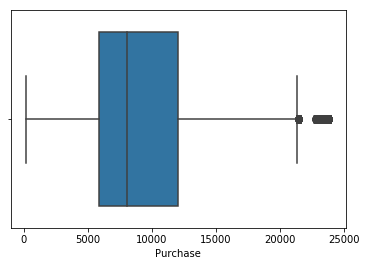

In [46]:
sns.boxplot(df.Purchase)

# Missing Values in Categorical data

In [47]:
df.select_dtypes(include=['object']).isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

There is no missing values in Categorical data

In [63]:
df.to_csv('cleaned_df.csv', index=None)

In [7]:
df1=pd.read_csv('cleaned_df.csv')
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,common_product,bachelor
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,0,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,0,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,0,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,0,1


In [27]:
df1['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [89]:
df3.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_group
0,1000001,P00069042,F,10,A,2,0,3,0.0,0.0,8370,1
1,1000001,P00248942,F,10,A,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,F,10,A,2,0,12,0.0,0.0,1422,1
3,1000001,P00085442,F,10,A,2,0,12,14.0,0.0,1057,1
4,1000002,P00285442,M,16,C,4+,0,8,0.0,0.0,7969,7


In [91]:
from sklearn.preprocessing import LabelEncoder

In [93]:
le_U_ID = LabelEncoder()
df3['User_ID'] = le_U_ID.fit_transform(df3['User_ID'])
le_P_ID = LabelEncoder()
df3['Product_ID'] = le_P_ID.fit_transform(df3['Product_ID'])
df3['Gender'] = np.where(df3['Gender']=='M',1,0) # Female: 0, Male: 1

In [95]:
df3.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_group
0,0,670,0,10,A,2,0,3,0.0,0.0,8370,1
1,0,2374,0,10,A,2,0,1,6.0,14.0,15200,1
2,0,850,0,10,A,2,0,12,0.0,0.0,1422,1
3,0,826,0,10,A,2,0,12,14.0,0.0,1057,1
4,1,2732,1,16,C,4+,0,8,0.0,0.0,7969,7


In [96]:
# Create a new dataframe with dummy variables for for our categorical features.
df = pd.get_dummies(df3, columns=['City_Category', 'Stay_In_Current_City_Years'])

In [98]:
df.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_group,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,670,0,10,0,3,0.0,0.0,8370,1,1,0,0,0,0,1,0,0
1,0,2374,0,10,0,1,6.0,14.0,15200,1,1,0,0,0,0,1,0,0
2,0,850,0,10,0,12,0.0,0.0,1422,1,1,0,0,0,0,1,0,0
3,0,826,0,10,0,12,14.0,0.0,1057,1,1,0,0,0,0,1,0,0
4,1,2732,1,16,0,8,0.0,0.0,7969,7,0,0,1,0,0,0,0,1


In [2]:
df=pd.read_csv('analytical_base_table.csv')

In [7]:
df.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_group,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,670,0,10,0,3,0.0,0.0,8370,1,1,0,0,0,0,1,0,0
1,0,2374,0,10,0,1,6.0,14.0,15200,1,1,0,0,0,0,1,0,0
2,0,850,0,10,0,12,0.0,0.0,1422,1,1,0,0,0,0,1,0,0
3,0,826,0,10,0,12,14.0,0.0,1057,1,1,0,0,0,0,1,0,0
4,1,2732,1,16,0,8,0.0,0.0,7969,7,0,0,1,0,0,0,0,1


# Machine Learning

In [5]:
print(df.shape)

(537577, 18)


## Test train Split

Since most features are discrete, Random Forest Regressor is expected to fit the data well. Since the given dataset contains ~half million entries, using all of them may cause running-time issue on my machine when trying to do some iterative works like generating the learning curve. Therefore, only the fraction (1/50) of its data (~10k) will be randomly sampled for initial ML model fitting attempts.

In [8]:
df_frac = df.sample(frac=0.02,random_state=100)


In [9]:
# Create separate object for target variable
y = df_frac.Purchase
# Create separate object for input features
X = df_frac.drop(['Purchase','User_ID','Product_ID'], axis=1)

In [10]:
df_frac.to_csv('final3.csv', index=None)

In [11]:
X.shape

(10752, 15)

In [12]:
X.head()

,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_group,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
158333,1,5,0,10,13.0,16.0,3,1,0,0,0,0,1,0,0
360142,1,20,1,5,0.0,0.0,4,1,0,0,0,1,0,0,0
513615,0,16,1,11,16.0,0.0,2,0,1,0,0,0,1,0,0
479446,1,20,1,11,0.0,0.0,3,0,1,0,0,1,0,0,0
146378,1,19,0,5,8.0,0.0,4,0,0,1,1,0,0,0,0


In [13]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [14]:
train_mean = X_train.mean()
train_std = X_train.std()

In [15]:
## Standardize the train data set  
X_train = (X_train - train_mean) / train_std  ## normalized formuld z=(x-m)/s.

In [16]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

## Model 1 Ridge Regression

In [121]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [122]:
model.best_estimator_

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [123]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [124]:
## Predict Test results
y_pred = model.predict(X_test)

In [125]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  4572.364255534099
R-squared:  0.1376286617287834
Mean Absolute Error:  3481.5183032698187


In [126]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  4646.66805015911
R-squared:  0.14328154695660045
Mean Absolute Error:  3551.407206901992


### Feature Importance

In [127]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=1000)
model.fit(X_train, y_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [128]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Product_Category_1
Product_Category_3
City_Category_C
Product_ID
Gender
City_Category_A
Age_group
Product_Category_2
City_Category_B
Occupation
User_ID
Marital_Status
Stay_In_Current_City_Years_0
Stay_In_Current_City_Years_4+
Stay_In_Current_City_Years_3
Stay_In_Current_City_Years_1
Stay_In_Current_City_Years_2


### Model-2 Random Forest Regression

In [30]:
## Reference for random search on random forest
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 15 minutes

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [31]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [33]:
## Predict Test results
y_pred = model.predict(X_test)

In [34]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  2329.415578305112
R-squared:  0.7761760153684616
Mean Absolute Error:  1740.8000521999409


In [35]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  3102.9076042851702
R-squared:  0.6179743598558171
Mean Absolute Error:  2301.1461673524504


In [36]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(n_estimators=300, min_samples_split=10, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Product_Category_1
Occupation
Product_Category_2
Product_Category_3
Age_group
Marital_Status
Stay_In_Current_City_Years_1
Gender
Stay_In_Current_City_Years_2
City_Category_C
City_Category_A
Stay_In_Current_City_Years_4+
Stay_In_Current_City_Years_3
City_Category_B
Stay_In_Current_City_Years_0


## Model-3 XGBoost Regression

In [38]:
## Reference for random search on xgboost
## https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [39]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [40]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [50]:
## Predict Test results
y_pred = model.predict(X_test)
y_pred

array([ 6562.5127, 11999.215 , 11838.709 , ..., 13236.201 ,  8509.992 ,
        7208.014 ], dtype=float32)

In [42]:
print("Train Results for XG BOOST Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for XG BOOST Regression:
*******************************
Root mean squared error:  2851.949622229939
R-squared:  0.6644970282239127
Mean Absolute Error:  2157.010600425881


In [43]:
print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for XGBoost Regression:
*******************************
Root mean squared error:  3034.203559067403
R-squared:  0.6347045594852916
Mean Absolute Error:  2263.184813232989


### Feature Importance

In [44]:
## Building the model again with the best hyperparameters
model = XGBRegressor(max_depth=4,learning_rate=0.1,n_estimators=400, reg_lambda=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
## Function to include figsize parameter
## Reference: https://stackoverflow.com/questions/40081888/xgboost-plot-importance-figure-size
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

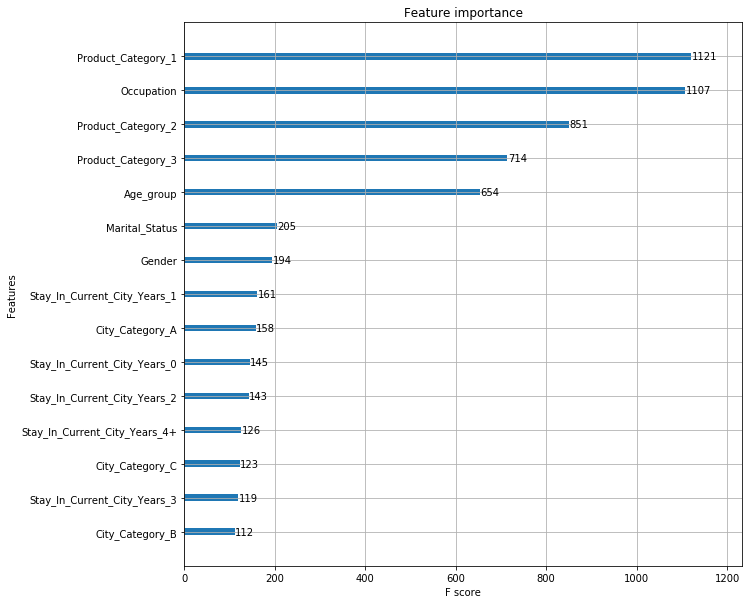

In [46]:
my_plot_importance(model, (10,10))

In [48]:
win_model = RandomForestRegressor(n_estimators=300, min_samples_split=10, min_samples_leaf=4)
win_model.fit(X_train, y_train)
joblib.dump(win_model, 'Black_Friday2.pkl') 

['Black_Friday2.pkl']

In [49]:
model.predict(X_test)

array([ 6562.5127, 11999.215 , 11838.709 , ..., 13236.201 ,  8509.992 ,
        7208.014 ], dtype=float32)